In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =pd.read_excel('Online_Retail.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Why am I dropping some rows?
*We do not have customer ID's for all entries, it would not make sense to analyse data for the ones without ID, so we drop them and the ones without description are also dropped as it is crucial*

In [4]:
data = data.dropna(subset=['Description','CustomerID'])


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [6]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [7]:
data['TotalPrice'] = data['Quantity']*data['UnitPrice']

In [8]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


### Now we will caluclate RFM values
*Recency, Frequency and Monetary*

In [9]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [10]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
reference_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)

# Perform RFM + Tenure + AvgOrderValue aggregation
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': [
        lambda x: (reference_date - x.max()).days,  # Recency
        lambda x: (x.max() - x.min()).days          # Tenure
    ],
    'InvoiceNo': 'nunique',                        # Frequency
    'TotalPrice': [
        'sum',                                     # Monetary
        lambda x: x.sum() / x.nunique()            # Avg Order Value
    ]
})

rfm.columns = ['Recency', 'Tenure', 'Frequency', 'Monetary', 'AvgOrderValue']
rfm = rfm.reset_index()
print(rfm.head())


   CustomerID  Recency  Tenure  Frequency  Monetary  AvgOrderValue
0     12346.0      326       0          2      0.00       0.000000
1     12347.0        2     365          7   4310.00      76.964286
2     12348.0       75     282          4   1797.24     112.327500
3     12349.0       19       0          1   1757.55      41.846429
4     12350.0      310       0          1    334.40      37.155556


In [11]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     4372 non-null   float64
 1   Recency        4372 non-null   int64  
 2   Tenure         4372 non-null   int64  
 3   Frequency      4372 non-null   int64  
 4   Monetary       4372 non-null   float64
 5   AvgOrderValue  4372 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 205.1 KB


In [12]:
rfm

,CustomerID,Recency,Tenure,Frequency,Monetary,AvgOrderValue
0,12346.0,326,0,2,0.00,0.000000
1,12347.0,2,365,7,4310.00,76.964286
2,12348.0,75,282,4,1797.24,112.327500
3,12349.0,19,0,1,1757.55,41.846429
4,12350.0,310,0,1,334.40,37.155556
...,...,...,...,...,...,...
4367,18280.0,278,0,1,180.60,22.575000
4368,18281.0,181,0,1,80.82,20.205000
4369,18282.0,8,118,3,176.60,16.054545
4370,18283.0,4,333,16,2094.88,27.206234


In [13]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     4372 non-null   float64
 1   Recency        4372 non-null   int64  
 2   Tenure         4372 non-null   int64  
 3   Frequency      4372 non-null   int64  
 4   Monetary       4372 non-null   float64
 5   AvgOrderValue  4372 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 205.1 KB


In [14]:
r_labels = range(1,6)
rfm['R_Score'] = pd.qcut(rfm['Recency'],q=5, labels=r_labels,duplicates='drop')

f_bins = pd.qcut(rfm['Frequency'],q=5,duplicates='drop')
f_labels = range(1,len(f_bins.cat.categories)+1)
rfm['F_Score'] = pd.qcut(rfm['Frequency'],q=5,labels=f_labels,duplicates='drop')

m_bins = pd.qcut(rfm['Monetary'],q=5,duplicates='drop')
m_labels = range(1,len(m_bins.cat.categories)+1)
rfm['M_Score'] = pd.qcut(rfm['Monetary'],q=5,labels=m_labels,duplicates= 'drop')

print(rfm.head())

   CustomerID  Recency  Tenure  Frequency  Monetary  AvgOrderValue R_Score  \
0     12346.0      326       0          2      0.00       0.000000       5   
1     12347.0        2     365          7   4310.00      76.964286       1   
2     12348.0       75     282          4   1797.24     112.327500       4   
3     12349.0       19       0          1   1757.55      41.846429       2   
4     12350.0      310       0          1    334.40      37.155556       5   

  F_Score M_Score  
0       1       1  
1       3       5  
2       2       4  
3       1       4  
4       1       2  


In [15]:
# Combine R, F, and M scores to create an RFM segment
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)


In [16]:
rfm

,CustomerID,Recency,Tenure,Frequency,Monetary,AvgOrderValue,R_Score,F_Score,M_Score,RFM_Segment
0,12346.0,326,0,2,0.00,0.000000,5,1,1,511
1,12347.0,2,365,7,4310.00,76.964286,1,3,5,135
2,12348.0,75,282,4,1797.24,112.327500,4,2,4,424
3,12349.0,19,0,1,1757.55,41.846429,2,1,4,214
4,12350.0,310,0,1,334.40,37.155556,5,1,2,512
...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,278,0,1,180.60,22.575000,5,1,1,511
4368,18281.0,181,0,1,80.82,20.205000,5,1,1,511
4369,18282.0,8,118,3,176.60,16.054545,1,2,1,121
4370,18283.0,4,333,16,2094.88,27.206234,1,4,5,145


In [17]:
# Define a function to label customers
def rfm_label(row):
    if row['RFM_Segment'] == '111':
        return 'Best Customers'
    elif row['R_Score'] == 5:
        return 'Lost Customers'
    elif row['F_Score'] == 5:
        return 'Loyal Customers'
    elif row['M_Score'] == 5:
        return 'Big Spenders'
    else:
        return 'Others'

# Apply the function to create labels
rfm['RFM_Label'] = rfm.apply(rfm_label, axis=1)


In [18]:
rfm

,CustomerID,Recency,Tenure,Frequency,Monetary,AvgOrderValue,R_Score,F_Score,M_Score,RFM_Segment,RFM_Label
0,12346.0,326,0,2,0.00,0.000000,5,1,1,511,Lost Customers
1,12347.0,2,365,7,4310.00,76.964286,1,3,5,135,Big Spenders
2,12348.0,75,282,4,1797.24,112.327500,4,2,4,424,Others
3,12349.0,19,0,1,1757.55,41.846429,2,1,4,214,Others
4,12350.0,310,0,1,334.40,37.155556,5,1,2,512,Lost Customers
...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,278,0,1,180.60,22.575000,5,1,1,511,Lost Customers
4368,18281.0,181,0,1,80.82,20.205000,5,1,1,511,Lost Customers
4369,18282.0,8,118,3,176.60,16.054545,1,2,1,121,Others
4370,18283.0,4,333,16,2094.88,27.206234,1,4,5,145,Big Spenders


In [19]:
# Display the first few rows with the RFM segments and labels
print(rfm[['CustomerID', 'RFM_Segment', 'RFM_Label']].head())


   CustomerID RFM_Segment       RFM_Label
0     12346.0         511  Lost Customers
1     12347.0         135    Big Spenders
2     12348.0         424          Others
3     12349.0         214          Others
4     12350.0         512  Lost Customers


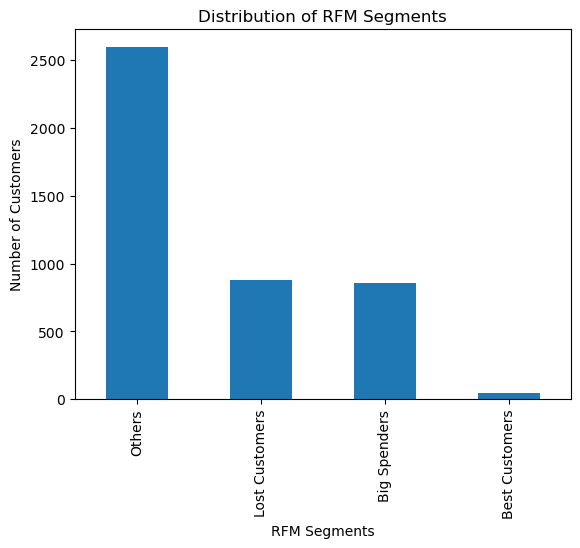

In [20]:
import matplotlib.pyplot as plt

# Plot the distribution of RFM labels
rfm['RFM_Label'].value_counts().plot(kind='bar')
plt.title('Distribution of RFM Segments')
plt.xlabel('RFM Segments')
plt.ylabel('Number of Customers')
plt.show()


In [21]:
unique_monetary_values = rfm['Monetary'].unique()
print(unique_monetary_values)


[   0.   4310.   1797.24 ...   80.82 2094.88 1837.28]


In [22]:
monetary_summary = rfm['Monetary'].describe()
print(monetary_summary)


count      4372.000000
mean       1898.459701
std        8219.345141
min       -4287.630000
25%         293.362500
50%         648.075000
75%        1611.725000
max      279489.020000
Name: Monetary, dtype: float64


In [23]:
monetary_distribution = rfm['Monetary'].value_counts()
print(monetary_distribution)


0.00       8
76.32      4
35.40      3
440.00     3
363.65     3
          ..
1614.91    1
554.22     1
289.91     1
134.70     1
1837.28    1
Name: Monetary, Length: 4288, dtype: int64


In [24]:
print(rfm[rfm['Monetary'] == 0])


      CustomerID  Recency  Tenure  Frequency  Monetary  AvgOrderValue R_Score  \
0        12346.0      326       0          2       0.0   0.000000e+00       5   
692      13256.0       14       0          1       0.0   0.000000e+00       2   
775      13364.0       67       4          2       0.0   5.075305e-16       3   
1642     14557.0       64      21          2       0.0   0.000000e+00       3   
1809     14792.0       64       0          2       0.0   0.000000e+00       3   
3245     16742.0       47       0          2       0.0   0.000000e+00       3   
3349     16878.0       25      59          2       0.0   0.000000e+00       2   
4358     18268.0      134       0          2       0.0   0.000000e+00       4   

     F_Score M_Score RFM_Segment       RFM_Label  
0          1       1         511  Lost Customers  
692        1       1         211          Others  
775        1       1         311          Others  
1642       1       1         311          Others  
1809       1   

In [25]:
cus_id = '12346'
print(data.loc[data['CustomerID'] ==cus_id ])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice]
Index: []


In [26]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [27]:
cus = 18268
customer_data = data[data['CustomerID']== cus]
print(customer_data)

       InvoiceNo StockCode                     Description  Quantity  \
281673   C561590    84968A  SET OF 16 VINTAGE ROSE CUTLERY        -2   
282994    561680    84968A  SET OF 16 VINTAGE ROSE CUTLERY         2   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
281673 2011-07-28 11:16:00      12.75     18268.0  United Kingdom       -25.5  
282994 2011-07-28 19:13:00      12.75     18268.0  United Kingdom        25.5  


In [28]:
rfm.head()

,CustomerID,Recency,Tenure,Frequency,Monetary,AvgOrderValue,R_Score,F_Score,M_Score,RFM_Segment,RFM_Label
0,12346.0,326,0,2,0.00,0.000000,5,1,1,511,Lost Customers
1,12347.0,2,365,7,4310.00,76.964286,1,3,5,135,Big Spenders
2,12348.0,75,282,4,1797.24,112.327500,4,2,4,424,Others
3,12349.0,19,0,1,1757.55,41.846429,2,1,4,214,Others
4,12350.0,310,0,1,334.40,37.155556,5,1,2,512,Lost Customers


In [29]:
rfm

,CustomerID,Recency,Tenure,Frequency,Monetary,AvgOrderValue,R_Score,F_Score,M_Score,RFM_Segment,RFM_Label
0,12346.0,326,0,2,0.00,0.000000,5,1,1,511,Lost Customers
1,12347.0,2,365,7,4310.00,76.964286,1,3,5,135,Big Spenders
2,12348.0,75,282,4,1797.24,112.327500,4,2,4,424,Others
3,12349.0,19,0,1,1757.55,41.846429,2,1,4,214,Others
4,12350.0,310,0,1,334.40,37.155556,5,1,2,512,Lost Customers
...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,278,0,1,180.60,22.575000,5,1,1,511,Lost Customers
4368,18281.0,181,0,1,80.82,20.205000,5,1,1,511,Lost Customers
4369,18282.0,8,118,3,176.60,16.054545,1,2,1,121,Others
4370,18283.0,4,333,16,2094.88,27.206234,1,4,5,145,Big Spenders


In [30]:
unq_r = rfm['R_Score'].value_counts()
print(unq_r)
print('------------------------------------')
unq_f = rfm['F_Score'].value_counts()
print(unq_f)
print('------------------------------------')
unq_m = rfm['M_Score'].value_counts()
print(unq_m)

2    904
1    876
5    875
4    860
3    857
Name: R_Score, dtype: int64
------------------------------------
1    2130
2     867
4     734
3     641
Name: F_Score, dtype: int64
------------------------------------
1    875
5    875
2    874
3    874
4    874
Name: M_Score, dtype: int64


In [31]:
print(rfm.columns)


Index(['CustomerID', 'Recency', 'Tenure', 'Frequency', 'Monetary',
       'AvgOrderValue', 'R_Score', 'F_Score', 'M_Score', 'RFM_Segment',
       'RFM_Label'],
      dtype='object')


In [32]:
rfm_backup = rfm.copy()  # Create a backup before making major changes


In [33]:
rfm_backup

,CustomerID,Recency,Tenure,Frequency,Monetary,AvgOrderValue,R_Score,F_Score,M_Score,RFM_Segment,RFM_Label
0,12346.0,326,0,2,0.00,0.000000,5,1,1,511,Lost Customers
1,12347.0,2,365,7,4310.00,76.964286,1,3,5,135,Big Spenders
2,12348.0,75,282,4,1797.24,112.327500,4,2,4,424,Others
3,12349.0,19,0,1,1757.55,41.846429,2,1,4,214,Others
4,12350.0,310,0,1,334.40,37.155556,5,1,2,512,Lost Customers
...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,278,0,1,180.60,22.575000,5,1,1,511,Lost Customers
4368,18281.0,181,0,1,80.82,20.205000,5,1,1,511,Lost Customers
4369,18282.0,8,118,3,176.60,16.054545,1,2,1,121,Others
4370,18283.0,4,333,16,2094.88,27.206234,1,4,5,145,Big Spenders


In [34]:
# Assuming your DataFrame is named rfm
rfm = rfm.drop(columns=['RFM_Label'])



In [35]:
# def rfm_label(row):
#     if row['R_Score']<3 and row['F_Score']>2 and row['M_Score'] >3:
#         return 'Best Customers'
#     elif row['R_Score']==3 and row['F_Score']==2 and ['M_Score']==2||['M_Score']==3:
#         return 'Medium'
    
    

In [ ]:
# def rfm_label(row):
#     # Define the conditions to cover all possible combinations
#     if row['R_Score'] in [1, 2] and row['F_Score'] in [4, 5] and row['M_Score'] in [4, 5]:
#         return 'Best Customers'
#     elif row['R_Score'] in [1, 2, 3] and row['F_Score'] in [4, 5] and row['M_Score'] in [3, 4, 5]:
#         return 'Loyal Customers'
#     elif row['R_Score'] in [1, 2, 3] and row['M_Score'] in [4, 5]:
#         return 'Big Spenders'
#     elif row['R_Score'] in [4, 5] and row['F_Score'] in [3, 4] and row['M_Score'] in [3, 4]:
#         return 'Almost Lost'
#     elif row['R_Score'] == 5 and row['F_Score'] in [1, 2] and row['M_Score'] in [1, 2]:
#         return 'Lost Customers'
#     elif row['R_Score'] in [2, 3] and row['F_Score'] in [3, 4] and row['M_Score'] in [3, 4]:
#         return 'Promising Customers'
#     elif row['R_Score'] == 4 and row['F_Score'] in [3, 4] and row['M_Score'] in [3, 4]:
#         return 'Need Attention'
#     # Add more conditions to cover other possible cases
#     elif row['R_Score'] in [1, 2, 3] and row['F_Score'] in [1, 2] and row['M_Score'] in [1, 2]:
#         return 'Low Value'
#     elif row['R_Score'] in [4, 5] and row['F_Score'] in [1, 2] and row['M_Score'] in [1, 2]:
#         return 'Engaged but Not Buying'
#     elif row['R_Score'] in [1, 2] and row['F_Score'] in [1, 2] and row['M_Score'] in [3, 4, 5]:
#         return 'High Potential'
#     elif row['R_Score'] in [4, 5] and row['F_Score'] in [4, 5] and row['M_Score'] in [1, 2]:
#         return 'Active but Low Spend'
#     else:
#         return 'Unclassified'

# # Apply the function to create labels
# rfm['RFM_Label'] = rfm.apply(rfm_label, axis=1)

# # Display the DataFrame to check the new column
# print(rfm[['R_Score', 'F_Score', 'M_Score', 'RFM_Label']].head())


In [36]:
rfm

,CustomerID,Recency,Tenure,Frequency,Monetary,AvgOrderValue,R_Score,F_Score,M_Score,RFM_Segment
0,12346.0,326,0,2,0.00,0.000000,5,1,1,511
1,12347.0,2,365,7,4310.00,76.964286,1,3,5,135
2,12348.0,75,282,4,1797.24,112.327500,4,2,4,424
3,12349.0,19,0,1,1757.55,41.846429,2,1,4,214
4,12350.0,310,0,1,334.40,37.155556,5,1,2,512
...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,278,0,1,180.60,22.575000,5,1,1,511
4368,18281.0,181,0,1,80.82,20.205000,5,1,1,511
4369,18282.0,8,118,3,176.60,16.054545,1,2,1,121
4370,18283.0,4,333,16,2094.88,27.206234,1,4,5,145


In [37]:
def rfm_label(row):
    # Define the conditions to cover all possible combinations
    if row['R_Score'] in [1, 2] and row['F_Score'] in [4, 5] and row['M_Score'] in [4, 5]:
        return 'Best Customers'
    elif row['R_Score'] in [1, 2, 3] and row['F_Score'] in [4, 5] and row['M_Score'] in [3, 4, 5]:
        return 'Loyal Customers'
    elif row['R_Score'] in [1, 2, 3] and row['M_Score'] in [4, 5]:
        return 'Big Spenders'
    elif row['R_Score'] in [4, 5] and row['F_Score'] in [3, 4] and row['M_Score'] in [3, 4]:
        return 'Almost Lost'
    elif row['R_Score'] == 5 and row['F_Score'] in [1, 2] and row['M_Score'] in [1, 2]:
        return 'Lost Customers'
    elif row['R_Score'] in [2, 3] and row['F_Score'] in [3, 4] and row['M_Score'] in [3, 4]:
        return 'Promising Customers'
    elif row['R_Score'] == 4 and row['F_Score'] in [3, 4] and row['M_Score'] in [3, 4]:
        return 'Need Attention'
    elif row['R_Score'] in [1, 2, 3] and row['F_Score'] in [1, 2] and row['M_Score'] in [1, 2]:
        return 'Low Value'
    elif row['R_Score'] in [4, 5] and row['F_Score'] in [1, 2] and row['M_Score'] in [1, 2]:
        return 'Engaged but Not Buying'
    elif row['R_Score'] in [1, 2] and row['F_Score'] in [1, 2] and row['M_Score'] in [3, 4, 5]:
        return 'High Potential'
    elif row['R_Score'] in [4,5] and row['F_Score'] in [1, 2] and row['M_Score'] in [3,4, 5]:
        return 'Infrequent Big Spenders'
    elif row['R_Score'] in [3,4,5] and row['F_Score'] in [3,4, 5] and row['M_Score'] in [3,4, 5]:
        return 'Potentially lost High value customers'
    elif row['R_Score'] in [4, 5] and row['F_Score'] in [4, 5] and row['M_Score'] in [1, 2]:
        return 'Active but Low Spend'
    elif row['R_Score'] in [3] and row['F_Score'] in [1, 2] and row['M_Score'] in [3]:
        return 'Infrequent Moderate Spenders'
    else:
        return 'Other'

# Apply the function to create labels
rfm['RFM_Label'] = rfm.apply(rfm_label, axis=1)


In [38]:
rfm.value_counts('RFM_Label')

RFM_Label
Big Spenders                             741
Low Value                                701
Lost Customers                           655
Best Customers                           581
Infrequent Big Spenders                  535
Engaged but Not Buying                   364
High Potential                           255
Infrequent Moderate Spenders             168
Almost Lost                              106
Loyal Customers                          101
Potentially lost High value customers     60
Promising Customers                       54
Other                                     48
Active but Low Spend                       3
dtype: int64

In [39]:
# Filter rows where the RFM_Label is 'other'
unclassified_rows = rfm[rfm['RFM_Label'] == 'Other']

# Display all rows with 'Unclassified' label
print(unclassified_rows)


      CustomerID  Recency  Tenure  Frequency  Monetary  AvgOrderValue R_Score  \
255      12654.0       11     284          5    601.98      35.410588       1   
311      12723.0        4      61          5    725.07      18.591538       1   
502      12994.0        4     264          5    902.22      23.742632       1   
562      13079.0        4     136          5    220.10      44.020000       1   
571      13092.0       71     288          6    459.83      27.048824       3   
585      13109.0        3     154          5    766.84      30.673600       1   
633      13171.0        8     291          5    426.81      12.933636       1   
663      13217.0      122      34          5    133.62      19.088571       4   
679      13238.0       11     349          5    680.83      61.893636       1   
744      13323.0        3      81          5    787.85      87.538889       1   
991      13672.0      301      32          6    -71.46      -7.146000       5   
1124     13856.0      169   

In [40]:
rfm

,CustomerID,Recency,Tenure,Frequency,Monetary,AvgOrderValue,R_Score,F_Score,M_Score,RFM_Segment,RFM_Label
0,12346.0,326,0,2,0.00,0.000000,5,1,1,511,Lost Customers
1,12347.0,2,365,7,4310.00,76.964286,1,3,5,135,Big Spenders
2,12348.0,75,282,4,1797.24,112.327500,4,2,4,424,Infrequent Big Spenders
3,12349.0,19,0,1,1757.55,41.846429,2,1,4,214,Big Spenders
4,12350.0,310,0,1,334.40,37.155556,5,1,2,512,Lost Customers
...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,278,0,1,180.60,22.575000,5,1,1,511,Lost Customers
4368,18281.0,181,0,1,80.82,20.205000,5,1,1,511,Lost Customers
4369,18282.0,8,118,3,176.60,16.054545,1,2,1,121,Low Value
4370,18283.0,4,333,16,2094.88,27.206234,1,4,5,145,Best Customers


In [41]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [42]:
data_cloned = data.copy()

In [43]:
data_cloned['InvoiceDate']=pd.to_datetime(data_cloned['InvoiceDate'])
data_cloned = data_cloned.sort_values(by=['CustomerID','InvoiceDate'])
data_cloned = data_cloned.reset_index(drop=True)

In [44]:
data_cloned


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.60
2,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,25.20
3,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,17.00
4,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,39.00
...,...,...,...,...,...,...,...,...,...
406824,570715,22419,LIPSTICK PEN RED,12,2011-10-12 10:23:00,0.42,18287.0,United Kingdom,5.04
406825,570715,22866,HAND WARMER SCOTTY DOG DESIGN,12,2011-10-12 10:23:00,2.10,18287.0,United Kingdom,25.20
406826,573167,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,36,2011-10-28 09:29:00,1.25,18287.0,United Kingdom,45.00
406827,573167,21824,PAINTED METAL STAR WITH HOLLY BELLS,48,2011-10-28 09:29:00,0.39,18287.0,United Kingdom,18.72


In [45]:
data_agg=data_cloned.groupby('CustomerID').agg({
    'TotalPrice':'sum',
    'InvoiceNo':'nunique',
    'InvoiceDate':['min','max'],
}).reset_index()

data_agg.columns=['CustomerID', 'TotalPurchase', 'PurchaseFrequency', 'FirstPurchaseDate', 'LastPurchaseDate']

data_agg['Recency']=(pd.Timestamp('today')-data_agg['LastPurchaseDate']).dt.days

In [46]:
print(data_agg.head())

   CustomerID  TotalPurchase  PurchaseFrequency   FirstPurchaseDate  \
0     12346.0           0.00                  2 2011-01-18 10:01:00   
1     12347.0        4310.00                  7 2010-12-07 14:57:00   
2     12348.0        1797.24                  4 2010-12-16 19:09:00   
3     12349.0        1757.55                  1 2011-11-21 09:51:00   
4     12350.0         334.40                  1 2011-02-02 16:01:00   

     LastPurchaseDate  Recency  
0 2011-01-18 10:17:00     4987  
1 2011-12-07 15:52:00     4663  
2 2011-09-25 13:13:00     4737  
3 2011-11-21 09:51:00     4680  
4 2011-02-02 16:01:00     4971  


In [47]:
data_agg

,CustomerID,TotalPurchase,PurchaseFrequency,FirstPurchaseDate,LastPurchaseDate,Recency
0,12346.0,0.00,2,2011-01-18 10:01:00,2011-01-18 10:17:00,4987
1,12347.0,4310.00,7,2010-12-07 14:57:00,2011-12-07 15:52:00,4663
2,12348.0,1797.24,4,2010-12-16 19:09:00,2011-09-25 13:13:00,4737
3,12349.0,1757.55,1,2011-11-21 09:51:00,2011-11-21 09:51:00,4680
4,12350.0,334.40,1,2011-02-02 16:01:00,2011-02-02 16:01:00,4971
...,...,...,...,...,...,...
4367,18280.0,180.60,1,2011-03-07 09:52:00,2011-03-07 09:52:00,4939
4368,18281.0,80.82,1,2011-06-12 10:53:00,2011-06-12 10:53:00,4842
4369,18282.0,176.60,3,2011-08-05 13:35:00,2011-12-02 11:43:00,4669
4370,18283.0,2094.88,16,2011-01-06 14:14:00,2011-12-06 12:02:00,4665


In [48]:
rfm['CustomerID'] = rfm['CustomerID'].astype(float)  # if needed, adjust according to actual types
data_cloned['CustomerID'] = data_cloned['CustomerID'].astype(float)

In [49]:
combined_df = pd.merge(data_agg, rfm, on='CustomerID', how='outer')

In [55]:
combined_df

,CustomerID,TotalPurchase,PurchaseFrequency,FirstPurchaseDate,LastPurchaseDate,Recency_y,Tenure,Frequency,Monetary,AvgOrderValue,R_Score,F_Score,M_Score,RFM_Segment,RFM_Label
0,12346.0,0.00,2,2011-01-18 10:01:00,2011-01-18 10:17:00,326,0,2,0.00,0.000000,5,1,1,511,Lost Customers
1,12347.0,4310.00,7,2010-12-07 14:57:00,2011-12-07 15:52:00,2,365,7,4310.00,76.964286,1,3,5,135,Big Spenders
2,12348.0,1797.24,4,2010-12-16 19:09:00,2011-09-25 13:13:00,75,282,4,1797.24,112.327500,4,2,4,424,Infrequent Big Spenders
3,12349.0,1757.55,1,2011-11-21 09:51:00,2011-11-21 09:51:00,19,0,1,1757.55,41.846429,2,1,4,214,Big Spenders
4,12350.0,334.40,1,2011-02-02 16:01:00,2011-02-02 16:01:00,310,0,1,334.40,37.155556,5,1,2,512,Lost Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,180.60,1,2011-03-07 09:52:00,2011-03-07 09:52:00,278,0,1,180.60,22.575000,5,1,1,511,Lost Customers
4368,18281.0,80.82,1,2011-06-12 10:53:00,2011-06-12 10:53:00,181,0,1,80.82,20.205000,5,1,1,511,Lost Customers
4369,18282.0,176.60,3,2011-08-05 13:35:00,2011-12-02 11:43:00,8,118,3,176.60,16.054545,1,2,1,121,Low Value
4370,18283.0,2094.88,16,2011-01-06 14:14:00,2011-12-06 12:02:00,4,333,16,2094.88,27.206234,1,4,5,145,Best Customers


In [54]:
    # Drop the 'Recency_x' column
combined_df = combined_df.drop(columns=['Recency_x'])

# Verify the column has been removed
print(combined_df.columns)


KeyError: "['Recency_x'] not found in axis"

In [57]:
combined_df

,CustomerID,TotalPurchase,PurchaseFrequency,FirstPurchaseDate,LastPurchaseDate,Recency_y,Tenure,Frequency,Monetary,AvgOrderValue,R_Score,F_Score,M_Score,RFM_Segment,RFM_Label
0,12346.0,0.00,2,2011-01-18 10:01:00,2011-01-18 10:17:00,326,0,2,0.00,0.000000,5,1,1,511,Lost Customers
1,12347.0,4310.00,7,2010-12-07 14:57:00,2011-12-07 15:52:00,2,365,7,4310.00,76.964286,1,3,5,135,Big Spenders
2,12348.0,1797.24,4,2010-12-16 19:09:00,2011-09-25 13:13:00,75,282,4,1797.24,112.327500,4,2,4,424,Infrequent Big Spenders
3,12349.0,1757.55,1,2011-11-21 09:51:00,2011-11-21 09:51:00,19,0,1,1757.55,41.846429,2,1,4,214,Big Spenders
4,12350.0,334.40,1,2011-02-02 16:01:00,2011-02-02 16:01:00,310,0,1,334.40,37.155556,5,1,2,512,Lost Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,180.60,1,2011-03-07 09:52:00,2011-03-07 09:52:00,278,0,1,180.60,22.575000,5,1,1,511,Lost Customers
4368,18281.0,80.82,1,2011-06-12 10:53:00,2011-06-12 10:53:00,181,0,1,80.82,20.205000,5,1,1,511,Lost Customers
4369,18282.0,176.60,3,2011-08-05 13:35:00,2011-12-02 11:43:00,8,118,3,176.60,16.054545,1,2,1,121,Low Value
4370,18283.0,2094.88,16,2011-01-06 14:14:00,2011-12-06 12:02:00,4,333,16,2094.88,27.206234,1,4,5,145,Best Customers


In [58]:
def churn_label(row):
    if row['Recency_y']>180:
        return 'Churned'
    if row['Recency_y']>90:
        return 'At Risk'
    else:
        return 'Active'

In [59]:
combined_df['Churn_Label'] = combined_df.apply(churn_label, axis=1)

# View the results
print(combined_df[['CustomerID', 'Recency_y', 'Churn_Label']].head())

   CustomerID  Recency_y Churn_Label
0     12346.0        326     Churned
1     12347.0          2      Active
2     12348.0         75      Active
3     12349.0         19      Active
4     12350.0        310     Churned


In [60]:
combined_df

,CustomerID,TotalPurchase,PurchaseFrequency,FirstPurchaseDate,LastPurchaseDate,Recency_y,Tenure,Frequency,Monetary,AvgOrderValue,R_Score,F_Score,M_Score,RFM_Segment,RFM_Label,Churn_Label
0,12346.0,0.00,2,2011-01-18 10:01:00,2011-01-18 10:17:00,326,0,2,0.00,0.000000,5,1,1,511,Lost Customers,Churned
1,12347.0,4310.00,7,2010-12-07 14:57:00,2011-12-07 15:52:00,2,365,7,4310.00,76.964286,1,3,5,135,Big Spenders,Active
2,12348.0,1797.24,4,2010-12-16 19:09:00,2011-09-25 13:13:00,75,282,4,1797.24,112.327500,4,2,4,424,Infrequent Big Spenders,Active
3,12349.0,1757.55,1,2011-11-21 09:51:00,2011-11-21 09:51:00,19,0,1,1757.55,41.846429,2,1,4,214,Big Spenders,Active
4,12350.0,334.40,1,2011-02-02 16:01:00,2011-02-02 16:01:00,310,0,1,334.40,37.155556,5,1,2,512,Lost Customers,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,180.60,1,2011-03-07 09:52:00,2011-03-07 09:52:00,278,0,1,180.60,22.575000,5,1,1,511,Lost Customers,Churned
4368,18281.0,80.82,1,2011-06-12 10:53:00,2011-06-12 10:53:00,181,0,1,80.82,20.205000,5,1,1,511,Lost Customers,Churned
4369,18282.0,176.60,3,2011-08-05 13:35:00,2011-12-02 11:43:00,8,118,3,176.60,16.054545,1,2,1,121,Low Value,Active
4370,18283.0,2094.88,16,2011-01-06 14:14:00,2011-12-06 12:02:00,4,333,16,2094.88,27.206234,1,4,5,145,Best Customers,Active


In [61]:
# Get the value counts of Churn_Label in combined_df
churn_counts = combined_df['Churn_Label'].value_counts()

# Display the churn counts
print(churn_counts)


Active     2918
Churned     864
At Risk     590
Name: Churn_Label, dtype: int64


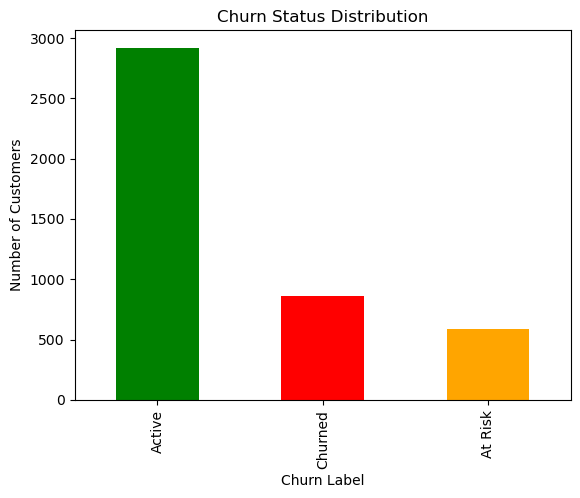

In [62]:
import matplotlib.pyplot as plt

# Plot the churn distribution
churn_counts.plot(kind='bar', color=['green', 'red', 'orange'])
plt.title('Churn Status Distribution')
plt.xlabel('Churn Label')
plt.ylabel('Number of Customers')
plt.show()


In [63]:
# Filtering at-risk customers
at_risk_customers = combined_df[combined_df['Churn_Label'] == 'At Risk']


In [64]:
at_risk_customers

,CustomerID,TotalPurchase,PurchaseFrequency,FirstPurchaseDate,LastPurchaseDate,Recency_y,Tenure,Frequency,Monetary,AvgOrderValue,R_Score,F_Score,M_Score,RFM_Segment,RFM_Label,Churn_Label
16,12363.0,552.00,2,2011-04-11 13:29:00,2011-08-22 10:18:00,110,132,2,552.00,69.000000,4,1,3,413,Infrequent Big Spenders,At Risk
27,12378.0,4008.62,1,2011-08-02 10:34:00,2011-08-02 10:34:00,130,0,1,4008.62,56.459437,4,1,5,415,Infrequent Big Spenders,At Risk
42,12399.0,1108.65,4,2011-03-23 09:42:00,2011-08-12 13:15:00,119,142,4,1108.65,52.792857,4,2,4,424,Infrequent Big Spenders,At Risk
46,12405.0,1710.39,1,2011-07-14 08:52:00,2011-07-14 08:52:00,149,0,1,1710.39,57.013000,4,1,4,414,Infrequent Big Spenders,At Risk
57,12418.0,668.58,1,2011-08-19 11:08:00,2011-08-19 11:08:00,113,0,1,668.58,33.429000,4,1,3,413,Infrequent Big Spenders,At Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4323,18222.0,443.00,1,2011-09-08 10:45:00,2011-09-08 10:45:00,93,0,1,443.00,29.533333,4,1,2,412,Engaged but Not Buying,At Risk
4344,18248.0,783.02,4,2011-06-06 13:18:00,2011-08-18 06:14:00,114,72,4,783.02,32.625833,4,2,3,423,Infrequent Big Spenders,At Risk
4353,18260.0,2595.00,8,2010-12-16 18:23:00,2011-06-20 12:37:00,173,185,8,2595.00,42.540984,4,4,5,445,Potentially lost High value customers,At Risk
4355,18262.0,149.48,1,2011-07-22 16:04:00,2011-07-22 16:04:00,140,0,1,149.48,14.948000,4,1,1,411,Engaged but Not Buying,At Risk
